<a href="https://www.kaggle.com/code/sonawanelalitsunil/mental-health-prediction-94-accuracy?scriptVersionId=208150809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score, confusion_matrix, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [4]:
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
test.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
6,140706,Armaan,Male,47.0,Visakhapatnam,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Healthy,MA,No,10.0,3.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
8,140708,Navya,Female,21.0,Surat,Student,NaN,1.0,NaN,7.39,3.0,NaN,Less than 5 hours,Healthy,BBA,No,8.0,1.0,Yes
9,140709,Harsha,Male,21.0,Jaipur,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,4.0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [7]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [8]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

# Handeling missing values

In [9]:
df.loc[df['Profession'].isnull()].head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
33,33,Tanmay,Male,29.0,Pune,Student,NaN,2.0,NaN,5.70,3.0,NaN,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
36,36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0


In [10]:
df.loc[df['Profession'].notnull()].head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
11,11,Aahana,Female,51.0,Patna,Working Professional,Teacher,NaN,1.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Arch,No,9.0,5.0,No,0


In [11]:
test[['Working Professional or Student', 'Profession']]

,Working Professional or Student,Profession
0,Working Professional,Judge
1,Working Professional,Educational Consultant
2,Working Professional,Teacher
3,Student,NaN
4,Working Professional,Teacher
...,...,...
93795,Working Professional,Pilot
93796,Working Professional,Pilot
93797,Student,NaN
93798,Working Professional,Marketing Manager


In [12]:
df_1 = df[['Working Professional or Student', 'Profession']]

In [13]:
df_1.head(10)

,Working Professional or Student,Profession
0,Working Professional,Chef
1,Working Professional,Teacher
2,Student,NaN
3,Working Professional,Teacher
4,Working Professional,Business Analyst
5,Working Professional,Finanancial Analyst
6,Working Professional,Chemist
7,Working Professional,Teacher
8,Student,NaN
9,Working Professional,Electrician


In [14]:
# Display unique values in the columns to verify consistency
print(df_1['Working Professional or Student'].unique())
print(df_1['Profession'].unique())

['Working Professional' 'Student']
['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj']


In [15]:
print(len(df_1.loc[(df_1['Working Professional or Student']=='Student')&(df_1['Profession']=='Student')]))
print(df_1.loc[(df_1['Working Professional or Student']=='Student')&(df_1['Profession']=='Student')])

3
       Working Professional or Student Profession
20049                          Student    Student
20296                          Student    Student
126162                         Student    Student


In [16]:
ind = df.loc[(df['Working Professional or Student']=='Student') & (df['Profession'].isnull())].index
for i in ind:
    df.loc[i, 'Profession'] = 'Student'

In [17]:
ind = test.loc[(test['Working Professional or Student']=='Student') & (test['Profession'].isnull())].index
for i in ind:
    test.loc[i, 'Profession'] = 'Student'

In [18]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                 8763
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [19]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                5886
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [20]:
df.loc[df['Profession'].isnull()][['Working Professional or Student', 'Profession']]

,Working Professional or Student,Profession
29,Working Professional,NaN
36,Working Professional,NaN
43,Working Professional,NaN
48,Working Professional,NaN
50,Working Professional,NaN
...,...,...
140647,Working Professional,NaN
140655,Working Professional,NaN
140666,Working Professional,NaN
140667,Working Professional,NaN


In [21]:
df.loc[df['Profession'].isnull()][['Degree', 'Profession']]

,Degree,Profession
29,Class 12,NaN
36,Class 12,NaN
43,Class 12,NaN
48,Class 12,NaN
50,Class 12,NaN
...,...,...
140647,Class 12,NaN
140655,PhD,NaN
140666,Class 12,NaN
140667,MHM,NaN


In [22]:
df_2 = df.loc[df['Profession'].isnull()][['Degree', 'Profession']]

In [23]:
df_2.head()

,Degree,Profession
29,Class 12,NaN
36,Class 12,NaN
43,Class 12,NaN
48,Class 12,NaN
50,Class 12,NaN


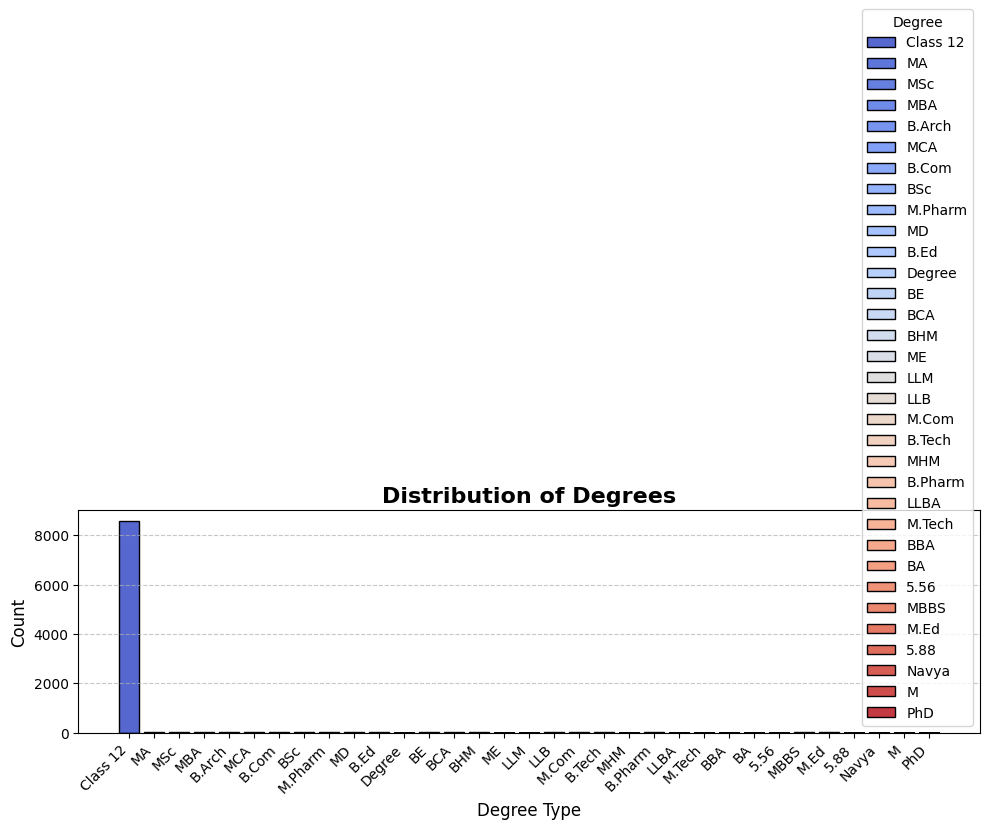

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_2,
    x='Degree',
    hue='Degree',  # Color bars by unique categories in Degree
    palette='coolwarm',  # Use a thematic palette
    shrink=0.8,  # Narrow the bars slightly for a modern look
    alpha=0.9,  # Semi-transparency for aesthetics
    edgecolor='black'  # Add borders to bars
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title("Distribution of Degrees", fontsize=16, weight='bold')
plt.xlabel("Degree Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add gridlines for a clean look
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
df.loc[(df['Profession']=='Class 12')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [26]:
def plot_donut_chart(name, data):
    # Prepare data
    plt.figure(figsize=(6, 6))
    palette_color = sns.color_palette('pastel')
    target_counts = data.value_counts()
    labels = target_counts.index

    # Create donut chart
    wedges, texts, autotexts = plt.pie(
        target_counts,
        labels=labels,
        colors=palette_color,
        autopct="%1.1f%%",
        shadow=True,
        startangle=140,
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
        pctdistance=0.85  # Move percentage text outward
    )

    # Add a circle at the center for the donut effect
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)

    # Add title
    plt.title(f"{name} Distribution", fontsize=18, weight='bold')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [27]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', nan, 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'Visakhapatnam',
       'Ph

In [28]:
ind = df.loc[(df['Degree']=='Class 12') & (df['Profession'].isnull())].index
for i in ind:
    df.loc[i, 'Profession'] = 'Class 12'

In [29]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', nan, 'Chemist', 'Content Writer', 'Consultant',
       'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'B.Ed', 'Working Professional', '3M', 'ME', 'B.Pharm',
       '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD', 'M.Ed', 'MD',
       'Name', 'MCA', 'Simran', 'Analyst', 'Profession', 'Unemployed',
       'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=object)

In [30]:
ind = test.loc[(test['Degree']=='Class 12') & (test['Profession'].isnull())].index
for i in ind:
    test.loc[i, 'Profession'] = 'Class 12'

In [31]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                  173
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [32]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [33]:
df.loc[df['Profession'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
591,591,Anvi,Female,49.0,Nagpur,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,MA,Yes,11.0,3.0,Yes,1
1316,1316,Shlok,Male,38.0,Ludhiana,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,7-8 hours,Unhealthy,MSc,Yes,1.0,4.0,No,0
2216,2216,Rudra,Male,20.0,Patna,Working Professional,NaN,NaN,3.0,NaN,NaN,4.0,5-6 hours,Unhealthy,MBA,Yes,8.0,4.0,Yes,0
2424,2424,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Moderate,B.Arch,Yes,7.0,5.0,Yes,1
3443,3443,Charvi,Female,26.0,Vasai-Virar,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,More than 8 hours,Unhealthy,MCA,No,10.0,3.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138770,138770,Lavanya,Female,54.0,Nagpur,Working Professional,NaN,NaN,3.0,NaN,NaN,2.0,5-6 hours,Moderate,MCA,Yes,7.0,5.0,Yes,0
139506,139506,Tejas,Male,20.0,Ahmedabad,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BHM,Yes,4.0,4.0,No,1
139674,139674,Armaan,Male,20.0,Varanasi,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,PhD,Yes,9.0,5.0,No,0
140655,140655,Kiran,Male,44.0,Meerut,Working Professional,NaN,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Healthy,PhD,No,0.0,4.0,No,0


In [34]:
df_2 = df.loc[df['Profession'].isnull()][['Age', 'Profession']]
df_2.head()

,Age,Profession
591,49.0,NaN
1316,38.0,NaN
2216,20.0,NaN
2424,18.0,NaN
3443,26.0,NaN


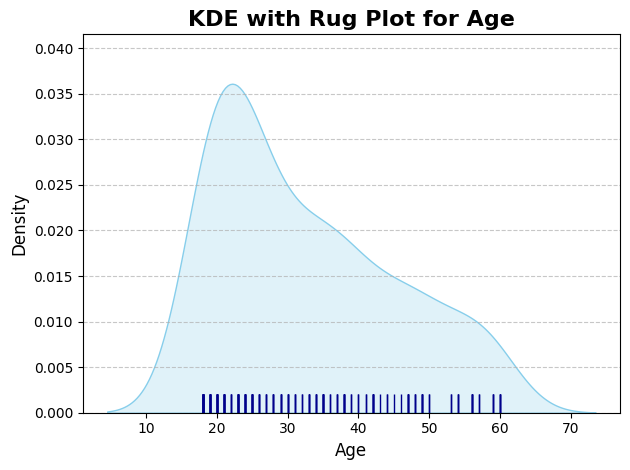

In [35]:
sns.kdeplot(data=df_2['Age'], shade=True, color="skyblue")
sns.rugplot(data=df_2['Age'], color="darkblue", height=0.05)

plt.title("KDE with Rug Plot for Age", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
df.fillna({'Profession': 'Unknown'}, inplace=True)
test.fillna({'Profession': 'Unknown'}, inplace=True)

In [37]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [38]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [39]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [40]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'Unknown', 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=obj

In [41]:
# Iterate over each profession
for i in df['Profession'].unique():
    # Get the mode of 'Academic Pressure' for the current profession
    mode_value = df.loc[(df['Profession'] == i) & (df['Academic Pressure'].notnull()), 'Academic Pressure'].mode()
    
    # If a mode exists, fill missing values with the mode
    if not mode_value.empty:
        df.loc[(df['Profession'] == i) & (df['Academic Pressure'].isnull()), 'Academic Pressure'] = mode_value[0]


In [42]:
for i in test['Profession'].unique():
    # Calculate the mode of 'Academic Pressure' for the current profession
    mode_value = test.loc[(test['Profession'] == i) & (test['Academic Pressure'].notnull()), 'Academic Pressure'].mode()
    
    # Fill missing values with the mode if it exists
    if not mode_value.empty:
        test.loc[(test['Profession'] == i) & (test['Academic Pressure'].isnull()), 'Academic Pressure'] = mode_value[0]

In [43]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                         42900
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [44]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        25414
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [45]:
df.loc[df['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140688,140688,Rajat,Male,48.0,Hyderabad,Working Professional,Chemist,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,B.Pharm,No,8.0,4.0,Yes,0
140692,140692,Raunak,Male,49.0,Bhopal,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,MBA,No,9.0,1.0,No,0
140693,140693,Shaurya,Male,55.0,Srinagar,Working Professional,Data Scientist,NaN,1.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,M.Tech,No,9.0,2.0,No,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [46]:
test.loc[test['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
12,140712,Advait,Male,48.0,Lucknow,Working Professional,Consultant,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,B.Com,No,4.0,3.0,No
15,140715,Anvi,Female,29.0,Thane,Working Professional,Research Analyst,NaN,2.0,NaN,NaN,5.0,7-8 hours,Healthy,MBA,No,10.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93792,234492,Advait,Male,23.0,Delhi,Working Professional,Consultant,NaN,2.0,NaN,NaN,3.0,Less than 5 hours,Moderate,B.Com,Yes,12.0,4.0,No
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [47]:
df_2 = df.loc[df['Academic Pressure'].isnull()][['Profession']]

In [48]:
df_2.head()

,Profession
4,Business Analyst
5,Finanancial Analyst
6,Chemist
9,Electrician
10,Software Engineer


In [49]:
df_3 = test.loc[test['Academic Pressure'].isnull()][['Profession']]

In [50]:
df_3.head()

,Profession
1,Educational Consultant
5,Customer Support
7,Customer Support
12,Consultant
15,Research Analyst


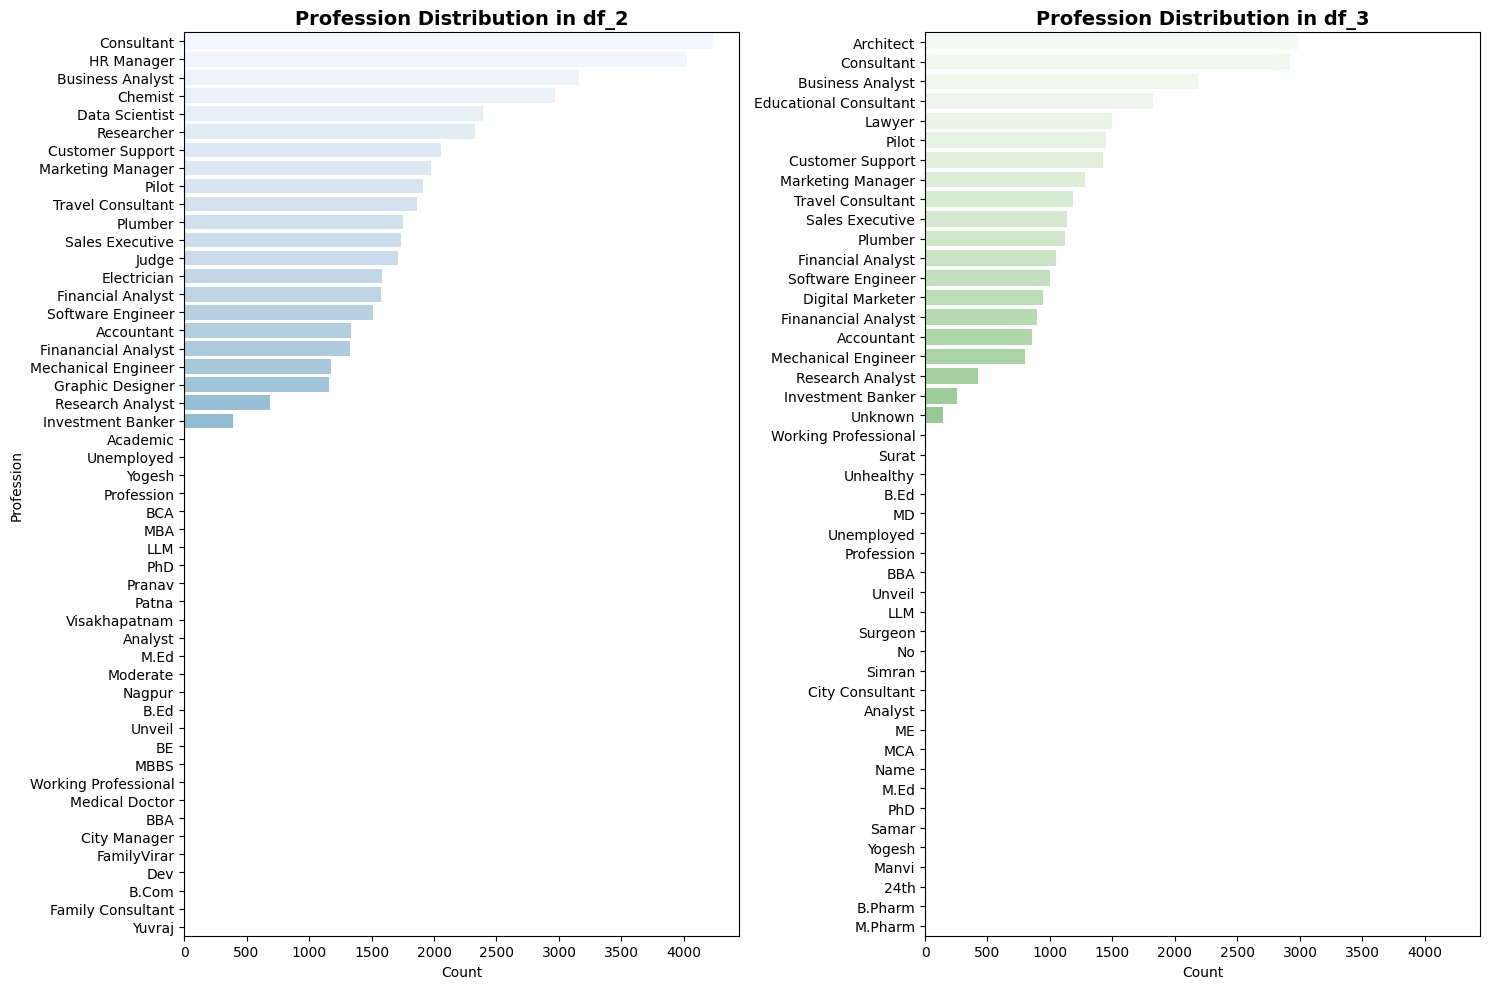

In [51]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15, 10))
sns.countplot(
    y=df_2['Profession'], 
    ax=axes[0], 
    order=df_2['Profession'].value_counts().index,
    palette='Blues'
)
axes[0].set_title('Profession Distribution in df_2', fontsize=14, weight='bold')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Profession')
sns.countplot(
    y=df_3['Profession'], 
    ax=axes[1], 
    order=df_3['Profession'].value_counts().index,
    palette='Greens'
)
axes[1].set_title('Profession Distribution in df_3', fontsize=14, weight='bold')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

In [52]:
print('Profession Train Len: ',len(Profession_name))
print('Profession Test Len: ',len(test_Profession_name))

Profession Train Len:  66
Profession Test Len:  66


In [53]:
Profession_test = df_2['Profession'].unique()
test_Profession_test = df_3['Profession'].unique()

In [54]:
print('Profession Train Len: ',len(Profession_test))
print('Profession Test Len: ',len(test_Profession_test))

Profession Train Len:  50
Profession Test Len:  46


In [55]:
# Using set operations for better performance
array_Profession_train = df_2[df_2['Profession'].isin(Profession_test)]['Profession'].drop_duplicates().tolist()

In [56]:
# Using set operations for better performance
array_Profession_test = df_3[df_3['Profession'].isin(test_Profession_test)]['Profession'].drop_duplicates().tolist()

In [57]:
# Loop through the array_Profession_test and get the mode for each profession
for i in array_Profession_test:
    # Calculate the mode for 'Academic Pressure' for the current profession
    mode_value = df.loc[df['Profession'] == i, 'Academic Pressure'].mode()
    
    if not mode_value.empty:
        print(i, mode_value[0])  # Print the profession and its mode

# Loop through the array_Profession_test and get the mode for each profession
for i in array_Profession_test:
    # Calculate the mode for 'Academic Pressure' for the current profession
    mode_value = df.loc[df['Profession'] == i, 'Academic Pressure'].mode()
    
    if not mode_value.empty:
        print(i, mode_value[0])  # Print the profession and its mode


Educational Consultant 3.0
Digital Marketer 5.0
Lawyer 4.0
Architect 3.0
Unknown 4.0
Educational Consultant 3.0
Digital Marketer 5.0
Lawyer 4.0
Architect 3.0
Unknown 4.0


In [58]:
# Define the 'test_Profession' dictionary
test_Profession = {
    'Educational Consultant': 3,
    'Digital Marketer': 5,
    'Lawyer': 4,
    'Architect': 3,
    'Unknown': 4,
}

# Update 'Academic Pressure' based on the 'test_Profession' mapping using vectorized operations
for name, value in test_Profession.items():
    test.loc[test['Profession'] == name, 'Academic Pressure'] = value


In [59]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        18021
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [60]:
for i in array_Profession_train:
    # Calculate the mode for 'Academic Pressure' for the current profession
    mode_value = test.loc[test['Profession'] == i, 'Academic Pressure'].mode()
    
    if not mode_value.empty:
        print(i, mode_value[0])  # Print the profession and its mode value

Chemist 3.0
Electrician 1.0
Data Scientist 4.0
HR Manager 5.0
Judge 4.0
Researcher 3.0
Graphic Designer 4.0


In [61]:
# Define the 'train_Profession' dictionary
train_Profession = {
    'Chemist': 3,
    'Electrician': 1,
    'Data Scientist': 4,
    'HR Manager': 5,
    'Judge': 4,
    'Researcher': 3,
    'Graphic Designer': 4,
}

# Update 'Academic Pressure' based on the 'train_Profession' mapping using vectorized operations
for name, value in train_Profession.items():
    df.loc[df['Profession'] == name, 'Academic Pressure'] = value

In [62]:
missing_values_count = df.isnull().sum()

In [63]:
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                         26736
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [64]:
df_2 = df.loc[df['Academic Pressure'].isnull()][['Profession']]
df_2.head()

,Profession
4,Business Analyst
5,Finanancial Analyst
10,Software Engineer
14,Plumber
15,Marketing Manager


In [65]:
df_3 = test.loc[test['Academic Pressure'].isnull()][['Profession']]
df_3.head()

,Profession
5,Customer Support
7,Customer Support
12,Consultant
15,Research Analyst
28,Marketing Manager


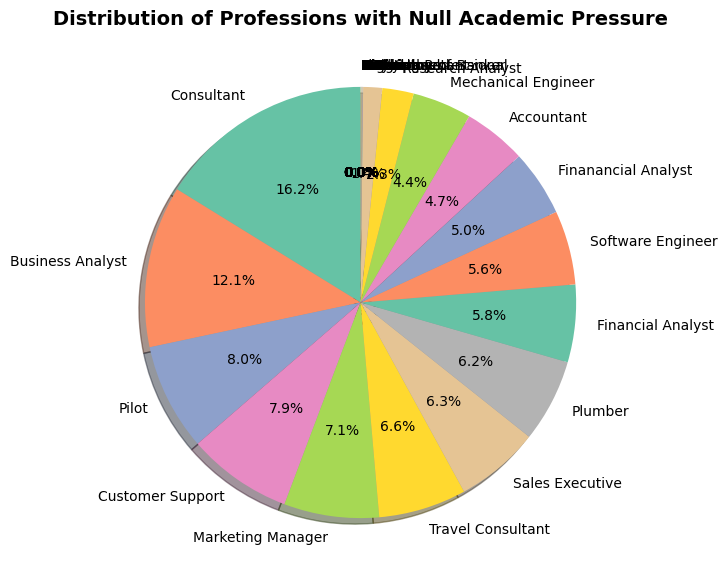

In [66]:
plt.figure(figsize=(7, 7))
profession_counts = df_3['Profession'].value_counts()
profession_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, shadow=True)
plt.title('Distribution of Professions with Null Academic Pressure', fontsize=14, weight='bold')
plt.ylabel('')
plt.show()


In [67]:
# Check if professions in 'Profession_test' exist in 'df_2' and 'df_3', then append them
array_Profession_train = [i for i in Profession_test if i in df_2['Profession'].values]
array_Profession_test = [i for i in test_Profession_test if i in df_3['Profession'].values]

In [68]:
# Get the professions that have 100 or more entries in df_2
valid_professions = df_2.groupby('Profession').size()
array_Profession_train = valid_professions[valid_professions >= 100].index.tolist()

In [69]:
# Get the professions that have 100 or more entries in df_3
valid_professions_test = df_3.groupby('Profession').size()
array_Profession_test = valid_professions_test[valid_professions_test >= 100].index.tolist()

In [70]:
array_Profession_train

['Accountant',
 'Business Analyst',
 'Consultant',
 'Customer Support',
 'Finanancial Analyst',
 'Financial Analyst',
 'Investment Banker',
 'Marketing Manager',
 'Mechanical Engineer',
 'Pilot',
 'Plumber',
 'Research Analyst',
 'Sales Executive',
 'Software Engineer',
 'Travel Consultant']

In [71]:
array_Profession_test

['Accountant',
 'Business Analyst',
 'Consultant',
 'Customer Support',
 'Finanancial Analyst',
 'Financial Analyst',
 'Investment Banker',
 'Marketing Manager',
 'Mechanical Engineer',
 'Pilot',
 'Plumber',
 'Research Analyst',
 'Sales Executive',
 'Software Engineer',
 'Travel Consultant']

In [72]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [73]:
df.loc[df['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
14,14,Kiran,Male,50.0,Thane,Working Professional,Plumber,NaN,1.0,NaN,NaN,1.0,More than 8 hours,Moderate,BE,Yes,8.0,5.0,Yes,0
15,15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140678,140678,Rajveer,Male,53.0,Varanasi,Working Professional,Business Analyst,NaN,4.0,NaN,NaN,3.0,7-8 hours,Healthy,MCA,No,12.0,1.0,Yes,0
140682,140682,Raghavendra,Male,42.0,Delhi,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,3.0,5-6 hours,Unhealthy,M.Tech,No,7.0,5.0,Yes,0
140692,140692,Raunak,Male,49.0,Bhopal,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,MBA,No,9.0,1.0,No,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [74]:
df_4 = df.loc[df['Academic Pressure'].isnull()][['Degree']]
df_4.head()

,Degree
4,BBA
5,MCA
10,BSc
14,BE
15,MA


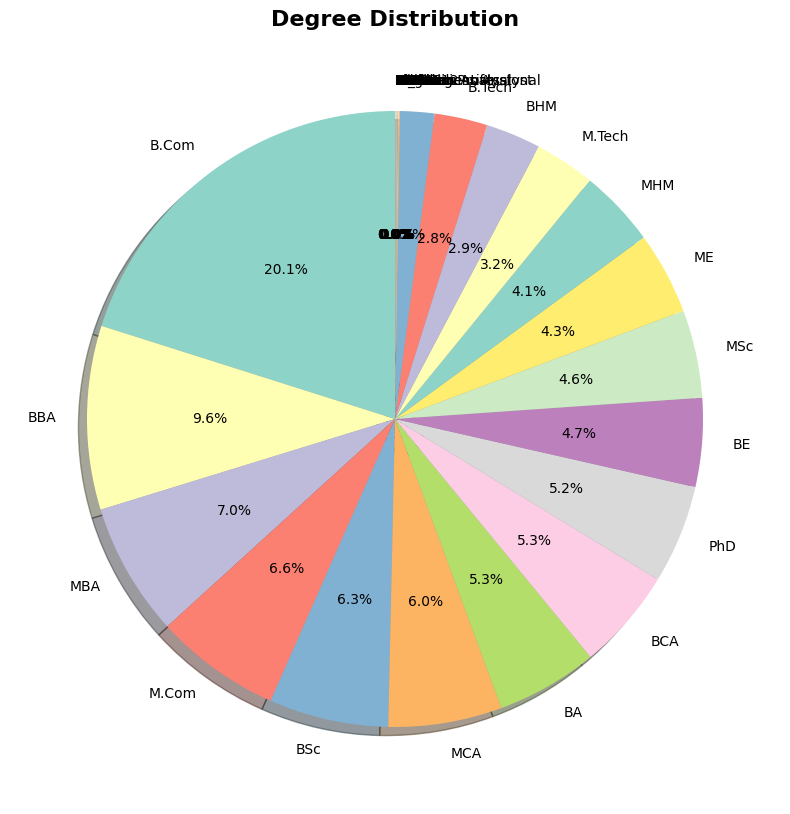

In [75]:
degree_counts = df_4['Degree'].value_counts()

plt.figure(figsize=(10, 10))
degree_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90, shadow=True)
plt.title('Degree Distribution', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()


In [76]:
degree = {
    "BCom": "B.Com", "B.Tech": "B.Tech", "BSc": "B.Sc", "BArch": "B.Arch",
    "BA": "B.A", "BBA": "BBA", "BCA": "BCA", "BE": "BE", "BEd": "B.Ed", 
    "BPharm": "B.Pharm", "LLB": "LLB", "MCom": "M.Com", "MTech": "M.Tech", 
    "MSc": "M.Sc", "MBA": "MBA", "MCA": "MCA", "MD": "MD", "ME": "ME", 
    "MEd": "M.Ed", "MArch": "M.Arch", "MPharm": "M.Pharm", "MA": "MA", 
    "MPA": "MPA", "LLM": "LLM", "PhD": "PhD", "MBBS": "MBBS", "CA": "CA",
    "Class 12": "Class 12", "12th": "Class 12", "Class 11": "Class 11", "11th": "Class 11"
}

In [77]:
df['Degree'] = df['Degree'].map(degree).fillna('Unknown')
test['Degree'] = test['Degree'].map(degree).fillna('Unknown')

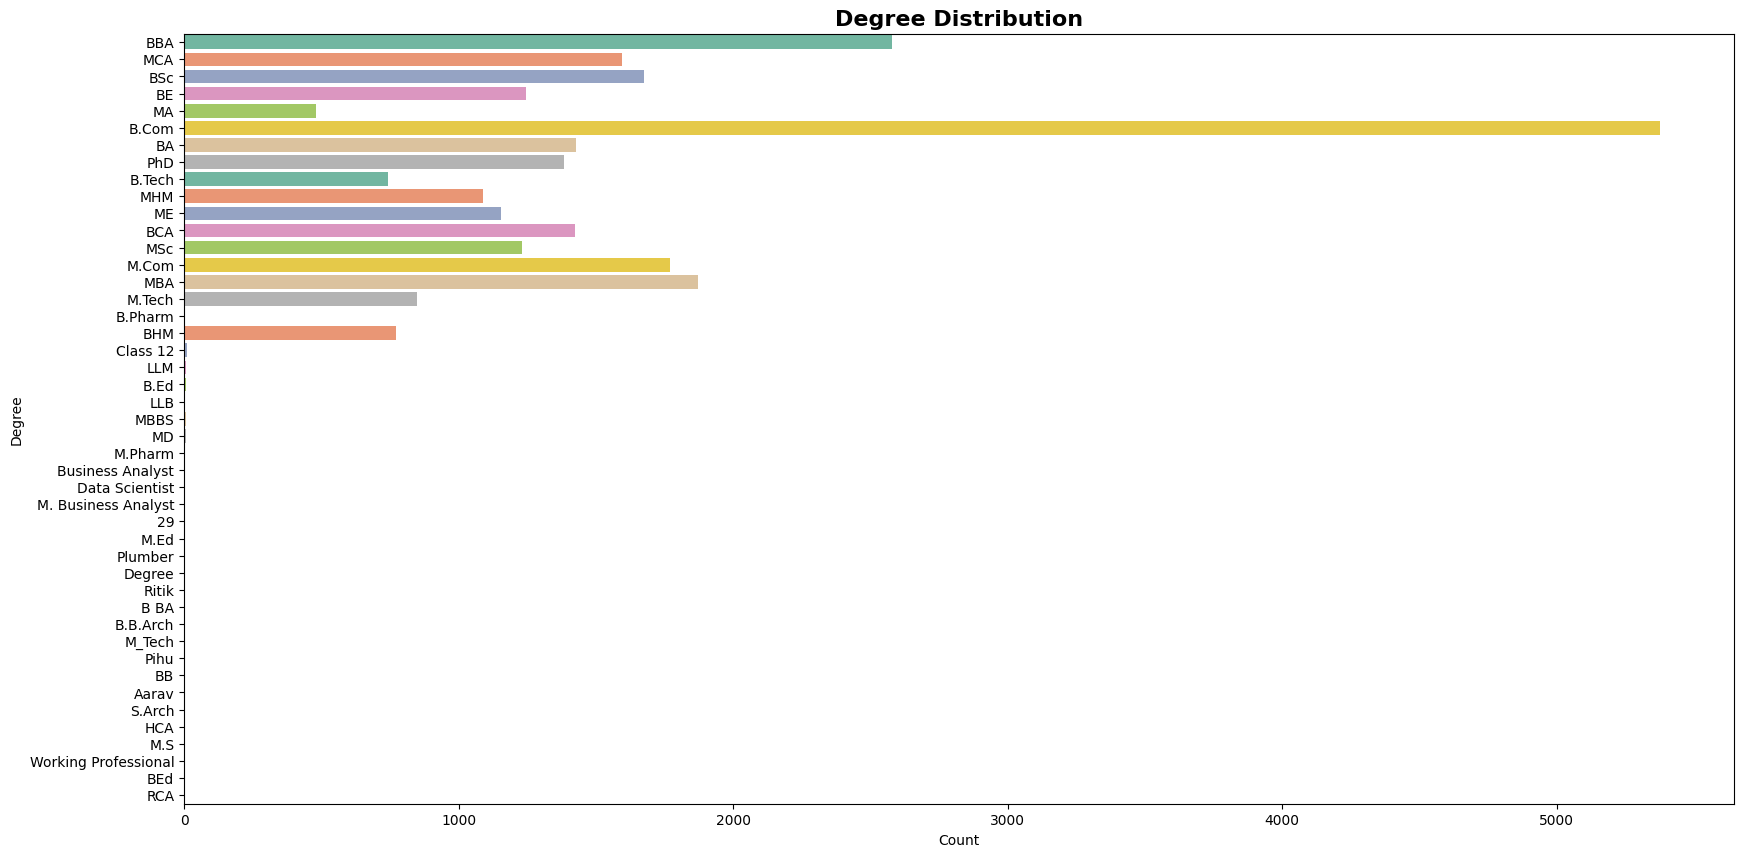

In [78]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df_4, y='Degree', palette='Set2')
plt.title('Degree Distribution', fontsize=16, weight='bold')
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()


In [79]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                         26736
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [80]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        18021
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [81]:
Academic_Pressure_med=df['Academic Pressure'].median()
df.fillna({'Academic Pressure':Academic_Pressure_med}, inplace=True)
test.fillna({'Academic Pressure':Academic_Pressure_med}, inplace=True)

In [82]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [83]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,Unknown,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,Unknown,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Unknown,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


# Study satisfaction 

In [84]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,Unknown,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,Unknown,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Unknown,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [85]:
df.groupby('Study Satisfaction').groups

{1.0: [59, 94, 239, 285, 301, 316, 328, 336, 340, 343, 347, 348, 441, 447, 457, 475, 491, 510, 523, 534, 535, 539, 543, 592, 609, 611, 620, 623, 660, 673, 676, 710, 750, 779, 781, 821, 847, 863, 912, 941, 953, 991, 995, 997, 1006, 1015, 1032, 1047, 1093, 1134, 1148, 1152, 1187, 1222, 1240, 1275, 1301, 1319, 1328, 1391, 1393, 1457, 1472, 1593, 1605, 1618, 1643, 1655, 1657, 1701, 1762, 1850, 1969, 2006, 2060, 2068, 2097, 2108, 2127, 2147, 2183, 2203, 2226, 2294, 2295, 2343, 2385, 2399, 2406, 2423, 2431, 2460, 2471, 2482, 2592, 2633, 2674, 2685, 2687, 2695, ...], 2.0: [2, 30, 120, 139, 208, 255, 270, 274, 303, 337, 454, 455, 467, 509, 530, 538, 589, 617, 658, 683, 707, 708, 733, 735, 737, 746, 758, 759, 763, 813, 839, 843, 852, 861, 949, 955, 956, 1003, 1012, 1029, 1049, 1087, 1105, 1186, 1201, 1213, 1225, 1232, 1254, 1307, 1360, 1379, 1384, 1453, 1467, 1493, 1498, 1501, 1515, 1580, 1609, 1623, 1629, 1659, 1709, 1769, 1770, 1864, 1876, 1908, 1922, 1925, 1928, 1932, 1952, 1970, 1985, 2051,

In [86]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [87]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'Unknown', 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=obj

In [88]:
# Create a mapping of 'Profession' to 'Study Satisfaction' mode
profession_satisfaction = {}

for i in test_Profession_name:
    satisfaction_mode = test.loc[(test['Profession'] == i) & (test['Study Satisfaction'].notnull()), 'Study Satisfaction'].mode()
    if len(satisfaction_mode) > 0:
        profession_satisfaction[i] = int(satisfaction_mode[0])

# Apply the mapping to update 'Study Satisfaction' based on 'Profession'
test['Study Satisfaction'] = test.apply(
    lambda row: profession_satisfaction.get(row['Profession'], row['Study Satisfaction']) if pd.isnull(row['Study Satisfaction']) else row['Study Satisfaction'], 
    axis=1
)

In [89]:
# Create a dictionary to store the mode of 'Study Satisfaction' for each 'Profession'
profession_satisfaction = {}

# Loop through the 'Profession_name' list and compute the mode for each profession
for i in Profession_name:
    satisfaction_mode = df.loc[(df['Profession'] == i) & (df['Study Satisfaction'].notnull()), 'Study Satisfaction'].mode()
    if len(satisfaction_mode) > 0:
        profession_satisfaction[i] = int(satisfaction_mode[0])

# Update 'Study Satisfaction' column for each 'Profession' where the value is null
df['Study Satisfaction'] = df.apply(
    lambda row: profession_satisfaction.get(row['Profession'], row['Study Satisfaction']) if pd.isnull(row['Study Satisfaction']) else row['Study Satisfaction'], 
    axis=1
)

In [90]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       25269
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [91]:
df.head(6)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,Unknown,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,Unknown,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,1.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0


In [92]:
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['Study Satisfaction']]))
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Working Professional or Student']=='Student')][['Study Satisfaction']]))

42900
0


In [93]:
print(len(df.loc[(df['Study Satisfaction'].notnull()) & (df['Profession']=='Teacher')][['Study Satisfaction']]))
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Profession']=='Teacher')][['Study Satisfaction']]))

24906
0


In [94]:
Degree_name = df['Degree'].unique()
Degree_name

array(['Unknown', 'LLB', 'BBA', 'MCA', 'MD', 'B.Sc', 'ME', 'BCA', 'BE',
       'MA', 'MBA', 'B.A', 'Class 12', 'PhD', 'M.Sc', 'B.Tech', 'LLM',
       'MBBS', 'MPA', 'B.Ed', 'Class 11', 'B.Pharm', 'M.Pharm', 'B.Arch',
       'M.Tech', 'M.Ed'], dtype=object)

In [95]:
for i in Degree_name:
    x = len(df.loc[(df['Study Satisfaction'].notnull()) & (df['Degree']==i)][['Study Satisfaction']])
    y = len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Degree']==i)][['Study Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

Unknown notnull:  46562 isnull:  13309
LLB notnull:  3421 isnull:  927
BBA notnull:  1680 isnull:  3350
MCA notnull:  2729 isnull:  2505
MD notnull:  2741 isnull:  642
B.Sc notnull:  2393 isnull:  2634
ME notnull:  1404 isnull:  2228
BCA notnull:  2936 isnull:  2803
BE notnull:  1354 isnull:  1750
MA notnull:  1752 isnull:  1135
MBA notnull:  1576 isnull:  2242
B.A notnull:  2079 isnull:  1671
Class 12 notnull:  14707 isnull:  22
PhD notnull:  1129 isnull:  1974
M.Sc notnull:  2437 isnull:  2442
B.Tech notnull:  2161 isnull:  2264
LLM notnull:  3861 isnull:  786
MBBS notnull:  2870 isnull:  212
MPA notnull:  1 isnull:  0
B.Ed notnull:  1 isnull:  1
Class 11 notnull:  1 isnull:  0
B.Pharm notnull:  1 isnull:  1
M.Pharm notnull:  0 isnull:  1
B.Arch notnull:  2 isnull:  0
M.Tech notnull:  0 isnull:  1
M.Ed notnull:  2 isnull:  0


In [96]:
# Create a dictionary to store the mode of 'Study Satisfaction' for each 'Degree'
degree_satisfaction = {}

# Compute the mode of 'Study Satisfaction' for each 'Degree'
for i in Degree_name:
    satisfaction_mode = df.loc[(df['Degree'] == i) & (df['Study Satisfaction'].notnull()), 'Study Satisfaction'].mode()
    if len(satisfaction_mode) > 0:
        degree_satisfaction[i] = int(satisfaction_mode[0])

# Update 'Study Satisfaction' column for each 'Degree' where the value is null
df['Study Satisfaction'] = df.apply(
    lambda row: degree_satisfaction.get(row['Degree'], row['Study Satisfaction']) if pd.isnull(row['Study Satisfaction']) else row['Study Satisfaction'], 
    axis=1
)


In [97]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                            2
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [98]:
test_Degree_name = test['Degree'].unique()
test_Degree_name

array(['LLB', 'Unknown', 'B.Sc', 'BCA', 'MA', 'B.A', 'BBA', 'Class 12',
       'MD', 'MBA', 'LLM', 'PhD', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA',
       'M.Sc', 'B.Arch', 'B.Pharm', 'M.Pharm', 'B.Ed'], dtype=object)

In [99]:
for i in test_Degree_name:
    x = len(test.loc[(test['Study Satisfaction'].notnull()) & (test['Degree']==i)][['Study Satisfaction']])
    y = len(test.loc[(test['Study Satisfaction'].isnull()) & (test['Degree']==i)][['Study Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

LLB notnull:  2337 isnull:  601
Unknown notnull:  29159 isnull:  10917
B.Sc notnull:  1955 isnull:  1359
BCA notnull:  2668 isnull:  1201
MA notnull:  1538 isnull:  395
B.A notnull:  1271 isnull:  1219
BBA notnull:  1663 isnull:  1724
Class 12 notnull:  9803 isnull:  9
MD notnull:  2280 isnull:  9
MBA notnull:  1246 isnull:  1224
LLM notnull:  2235 isnull:  898
PhD notnull:  1081 isnull:  992
BE notnull:  1190 isnull:  976
MBBS notnull:  2027 isnull:  6
B.Tech notnull:  2306 isnull:  579
ME notnull:  1493 isnull:  898
MCA notnull:  2099 isnull:  1339
M.Sc notnull:  2174 isnull:  922
B.Arch notnull:  0 isnull:  1
B.Pharm notnull:  3 isnull:  0
M.Pharm notnull:  2 isnull:  0
B.Ed notnull:  1 isnull:  0


In [100]:
# Create a dictionary to store the mode of 'Study Satisfaction' for each 'Degree'
degree_satisfaction_test = {}

# Compute the mode of 'Study Satisfaction' for each 'Degree' in the test dataframe
for i in test_Degree_name:
    satisfaction_mode = test.loc[(test['Degree'] == i) & (test['Study Satisfaction'].notnull()), 'Study Satisfaction'].mode()
    if len(satisfaction_mode) > 0:
        degree_satisfaction_test[i] = int(satisfaction_mode[0])

# Update 'Study Satisfaction' column for each 'Degree' where the value is null
test['Study Satisfaction'] = test.apply(
    lambda row: degree_satisfaction_test.get(row['Degree'], row['Study Satisfaction']) if pd.isnull(row['Study Satisfaction']) else row['Study Satisfaction'], 
    axis=1
)


In [101]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                           1
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [102]:
Study_Satisfaction_med = df['Study Satisfaction'].median()

In [103]:
df.fillna({'Study Satisfaction': Study_Satisfaction_med}, inplace=True)
test.fillna({'Study Satisfaction': Study_Satisfaction_med}, inplace=True)

In [104]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

# Working pressure columns

In [105]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,Unknown,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,Unknown,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,1.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,5.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,1.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,1.0,4.0,7-8 hours,Unhealthy,Unknown,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,4.0,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [106]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Unknown',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'V

In [107]:
# Assuming you have the counts in a DataFrame
work_pressure_counts = df.groupby('Profession')['Work Pressure'].agg(
    notnull='count',
    isnull='size'
).reset_index()

# Then use iterrows() on the DataFrame
for i, row in work_pressure_counts.iterrows():
    print(f"{row['Profession']}: notnull = {row['notnull']}, isnull = {row['isnull']}")


Academic: notnull = 5, isnull = 5
Accountant: notnull = 1339, isnull = 1339
Analyst: notnull = 1, isnull = 1
Architect: notnull = 4362, isnull = 4370
B.Com: notnull = 1, isnull = 1
B.Ed: notnull = 1, isnull = 1
BBA: notnull = 1, isnull = 1
BCA: notnull = 3, isnull = 3
BE: notnull = 1, isnull = 1
Business Analyst: notnull = 3161, isnull = 3161
Chef: notnull = 2860, isnull = 2862
Chemist: notnull = 2967, isnull = 2967
City Manager: notnull = 1, isnull = 1
Civil Engineer: notnull = 1469, isnull = 1470
Class 12: notnull = 8577, isnull = 8590
Consultant: notnull = 4229, isnull = 4229
Content Writer: notnull = 7811, isnull = 7814
Customer Support: notnull = 2055, isnull = 2055
Data Scientist: notnull = 2390, isnull = 2390
Dev: notnull = 1, isnull = 1
Digital Marketer: notnull = 1369, isnull = 1372
Doctor: notnull = 3253, isnull = 3255
Educational Consultant: notnull = 2851, isnull = 2852
Electrician: notnull = 1582, isnull = 1582
Entrepreneur: notnull = 2967, isnull = 2968
Family Consultant:

In [108]:
for profession in Profession_name:
    # Get the mode of 'Work Pressure' for the current profession
    mode_value = df.loc[(df['Profession'] == profession) & (df['Work Pressure'].notnull()), 'Work Pressure'].mode()
    
    # If mode is found, fill missing values with the mode
    if not mode_value.empty:
        mode_value = mode_value.iloc[0]  # Get the mode value (first element)
        df.loc[df['Profession'] == profession, 'Work Pressure'] = df.loc[df['Profession'] == profession, 'Work Pressure'].fillna(mode_value)


In [109]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [110]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'Unknown', 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=obj

In [111]:
for profession in test_Profession_name:
    # Get the mode of 'Work Pressure' for the current profession
    mode_value = test.loc[(test['Profession'] == profession) & (test['Work Pressure'].notnull()), 'Work Pressure'].mode()
    
    # If mode is found, fill missing values with the mode
    if not mode_value.empty:
        mode_value = mode_value.iloc[0]  # Get the mode value (first element)
        test.loc[test['Profession'] == profession, 'Work Pressure'] = test.loc[test['Profession'] == profession, 'Work Pressure'].fillna(mode_value)


In [112]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                2
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [113]:
# Calculate the median value of 'Work Pressure' from df
Work_Pressure_med = df['Work Pressure'].median()

# Fill missing values in both df and test DataFrames with the median
df['Work Pressure'].fillna(Work_Pressure_med, inplace=True)
test['Work Pressure'].fillna(Work_Pressure_med, inplace=True)


In [114]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

# JOB satisfaction

In [115]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,Unknown,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,3.0,8.97,2.0,NaN,5-6 hours,Healthy,Unknown,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,1.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,5.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,1.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,1.0,4.0,7-8 hours,Unhealthy,Unknown,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,3.0,5.90,5.0,NaN,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,4.0,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [116]:
# Counts for 'Working Professional' with missing and non-missing Job Satisfaction
working_professional_isna = len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Working Professional or Student'] == 'Working Professional')])
working_professional_notna = len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Working Professional or Student'] == 'Working Professional')])

# Counts for 'Student' with missing and non-missing Job Satisfaction
student_isna = len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Working Professional or Student'] == 'Student')])
student_notna = len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Working Professional or Student'] == 'Student')])

# Print results
print(f'Working Professional & Job Satisfaction = isnull : {working_professional_isna}')
print(f'Working Professional & Job Satisfaction = notnull : {working_professional_notna}')

print(f'Student & Job Satisfaction = isnull : {student_isna}')
print(f'Student & Job Satisfaction = notnull : {student_notna}')

Working Professional & Job Satisfaction = isnull : 17
Working Professional & Job Satisfaction = notnull : 112782
Student & Job Satisfaction = isnull : 27893
Student & Job Satisfaction = notnull : 8


In [117]:
# Iterate through each degree in Degree_name
for i in Degree_name:
    # Count non-null Job Satisfaction for "Working Professional" in the current degree
    x = len(df.loc[(df['Job Satisfaction'].notnull()) & 
                   (df['Degree'] == i) & 
                   (df['Working Professional or Student'] == 'Working Professional')][['Job Satisfaction']])
    
    # Count null Job Satisfaction for "Working Professional" in the current degree
    y = len(df.loc[(df['Job Satisfaction'].isnull()) & 
                   (df['Degree'] == i) & 
                   (df['Working Professional or Student'] == 'Working Professional')][['Job Satisfaction']])
    
    # Print the results for the current degree
    print(i, 'notnull:', x, 'isnull:', y)


Unknown notnull: 49899 isnull: 5
LLB notnull: 3677 isnull: 0
BBA notnull: 4334 isnull: 0
MCA notnull: 4190 isnull: 0
MD notnull: 2810 isnull: 1
B.Sc notnull: 4139 isnull: 0
ME notnull: 3447 isnull: 0
BCA notnull: 4306 isnull: 0
BE notnull: 2491 isnull: 0
MA notnull: 2343 isnull: 0
MBA notnull: 3256 isnull: 0
B.A notnull: 3150 isnull: 0
Class 12 notnull: 8638 isnull: 11
PhD notnull: 2581 isnull: 0
M.Sc notnull: 3689 isnull: 0
B.Tech notnull: 3273 isnull: 0
LLM notnull: 4165 isnull: 0
MBBS notnull: 2386 isnull: 0
MPA notnull: 0 isnull: 0
B.Ed notnull: 2 isnull: 0
Class 11 notnull: 0 isnull: 0
B.Pharm notnull: 1 isnull: 0
M.Pharm notnull: 1 isnull: 0
B.Arch notnull: 1 isnull: 0
M.Tech notnull: 1 isnull: 0
M.Ed notnull: 2 isnull: 0


In [118]:
for degree in Degree_name:
    # Find the mode (most frequent) of Job Satisfaction for "Working Professional" in the current degree
    mode_value = df.loc[(df['Degree'] == degree) & 
                        (df['Job Satisfaction'].notnull()) & 
                        (df['Working Professional or Student'] == 'Working Professional'), 
                        'Job Satisfaction'].mode()

    # If mode_value exists, fill missing values with it
    if len(mode_value) > 0:
        mode_value = mode_value[0]  # Get the most frequent value
        # Fill missing Job Satisfaction for the current degree
        df.loc[(df['Degree'] == degree) & 
               (df['Job Satisfaction'].isnull()) & 
               (df['Working Professional or Student'] == 'Working Professional'), 
               'Job Satisfaction'] = mode_value


In [119]:
for degree in Degree_name:
    # Find the mode (most frequent) of Job Satisfaction for "Working Professional" in the current degree
    mode_value = df.loc[(df['Degree'] == degree) & 
                        (df['Job Satisfaction'].notnull()) & 
                        (df['Working Professional or Student'] == 'Working Professional'), 
                        'Job Satisfaction'].mode()

    # If mode_value exists, fill missing values with it
    if len(mode_value) > 0:
        mode_value = mode_value[0]  # Get the most frequent value
        # Fill missing Job Satisfaction for the current degree
        df.loc[(df['Degree'] == degree) & 
               (df['Job Satisfaction'].isnull()) & 
               (df['Working Professional or Student'] == 'Working Professional'), 
               'Job Satisfaction'] = mode_value


In [120]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                          27893
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [121]:
test_Degree_name = test['Degree'].unique()
test_Degree_name

array(['LLB', 'Unknown', 'B.Sc', 'BCA', 'MA', 'B.A', 'BBA', 'Class 12',
       'MD', 'MBA', 'LLM', 'PhD', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA',
       'M.Sc', 'B.Arch', 'B.Pharm', 'M.Pharm', 'B.Ed'], dtype=object)

In [122]:
for degree in test_Degree_name:
    # Find the mode (most frequent) of Job Satisfaction for "Working Professional" in the current degree
    mode_value = test.loc[(test['Degree'] == degree) & 
                          (test['Job Satisfaction'].notnull()) & 
                          (test['Working Professional or Student'] == 'Working Professional'), 
                          'Job Satisfaction'].mode()

    # If mode_value exists, fill missing values with it
    if len(mode_value) > 0:
        mode_value = mode_value[0]  # Get the most frequent value
        # Fill missing Job Satisfaction for the current degree for working professionals
        test.loc[(test['Degree'] == degree) & 
                 (test['Job Satisfaction'].isnull()) & 
                 (test['Working Professional or Student'] == 'Working Professional'), 
                 'Job Satisfaction'] = mode_value


In [123]:
for degree in test_Degree_name:
    # Find the mode (most frequent) of Job Satisfaction for "Student" in the current degree
    mode_value = test.loc[(test['Degree'] == degree) & 
                          (test['Job Satisfaction'].notnull()) & 
                          (test['Working Professional or Student'] == 'Student'), 
                          'Job Satisfaction'].mode()

    # If mode_value exists, fill missing values with it
    if len(mode_value) > 0:
        mode_value = mode_value[0]  # Get the most frequent value
        # Fill missing Job Satisfaction for the current degree for students
        test.loc[(test['Degree'] == degree) & 
                 (test['Job Satisfaction'].isnull()) & 
                 (test['Working Professional or Student'] == 'Student'), 
                 'Job Satisfaction'] = mode_value


In [124]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                          6352
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [125]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                          27893
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [126]:
# Calculate the median of 'Job Satisfaction' column
Job_Satisfaction_med = df['Job Satisfaction'].median()

# Fill missing 'Job Satisfaction' values in 'df' and 'test' datasets with the median value
df.fillna({'Job Satisfaction': Job_Satisfaction_med}, inplace=True)
test.fillna({'Job Satisfaction': Job_Satisfaction_med}, inplace=True)


In [127]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

# CGPA with other columns

In [128]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,Unknown,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,Unknown,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,1.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,5.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,1.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,1.0,4.0,7-8 hours,Unhealthy,Unknown,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,3.0,5.90,5.0,3.0,5-6 hours,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,4.0,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [129]:
# Count missing and non-missing 'CGPA' values for 'Working Professional'
print('Working Professional & CGPA = isnull :', 
      len(df.loc[(df['CGPA'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]))
print('Working Professional & CGPA = notnull :', 
      len(df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]))

Working Professional & CGPA = isnull : 112793
Working Professional & CGPA = notnull : 6


In [130]:
# Count missing and non-missing 'CGPA' values for 'Student'
print('Student & CGPA = isnull :', 
      len(df.loc[(df['CGPA'].isnull()) & (df['Working Professional or Student']=='Student')][['CGPA']]))
print('Student & CGPA = notnull :', 
      len(df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Student')][['CGPA']]))

Student & CGPA = isnull : 9
Student & CGPA = notnull : 27892


In [131]:
df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]

,CGPA
18752,8.14
41915,8.04
55827,8.11
60348,9.72
99062,5.42
101189,8.24


In [132]:
df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Student')][['CGPA']].head()

,CGPA
2,8.97
8,5.90
26,7.03
30,5.59
32,8.13


## Sleep Duration 

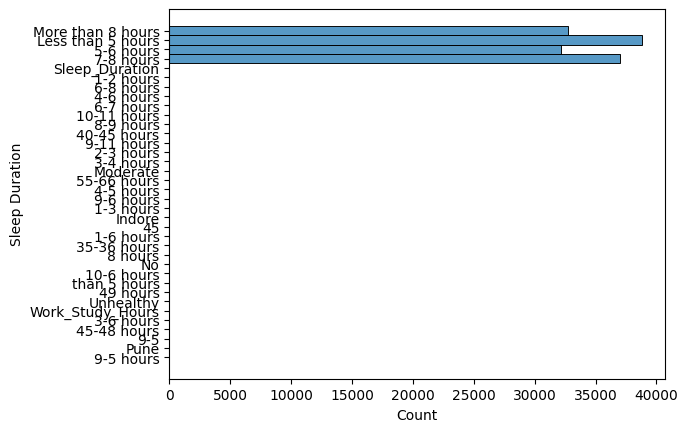

In [133]:
figsize=(20,10)
sns.histplot(data = df ,y='Sleep Duration');

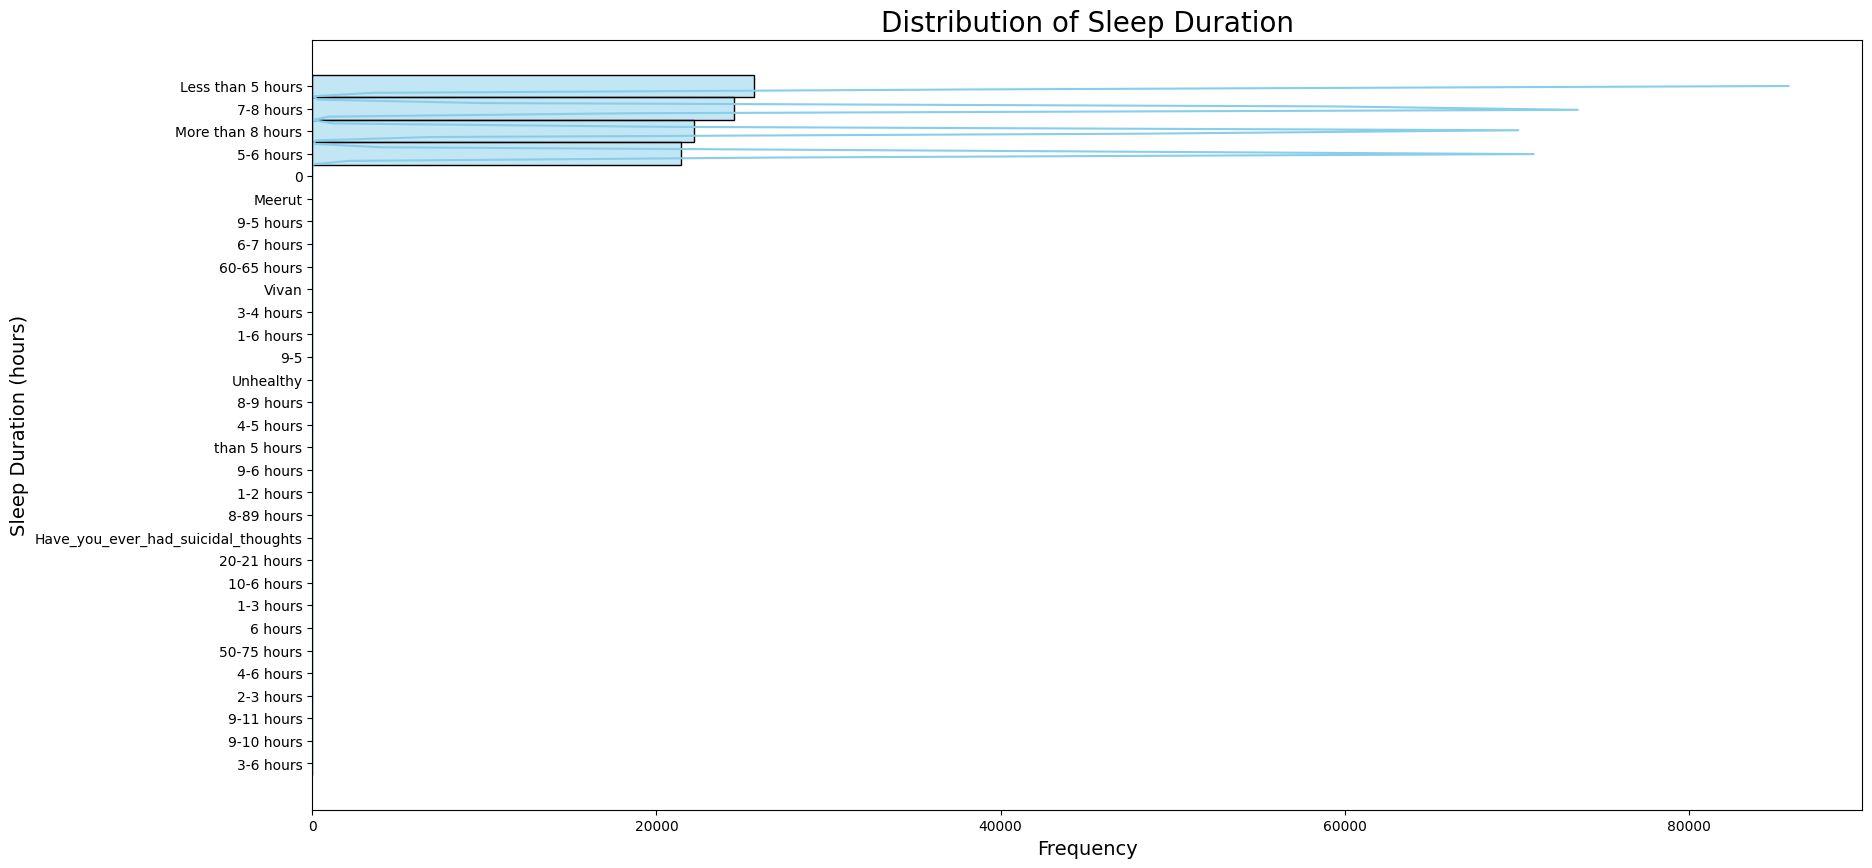

In [134]:
# Set figure size for better readability
plt.figure(figsize=(20, 10))

# Plot histogram using seaborn
sns.histplot(data=test, y='Sleep Duration', kde=True, color='skyblue', bins=30)

# Add title and labels
plt.title('Distribution of Sleep Duration', fontsize=20)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Sleep Duration (hours)', fontsize=14)

# Show the plot
plt.show()

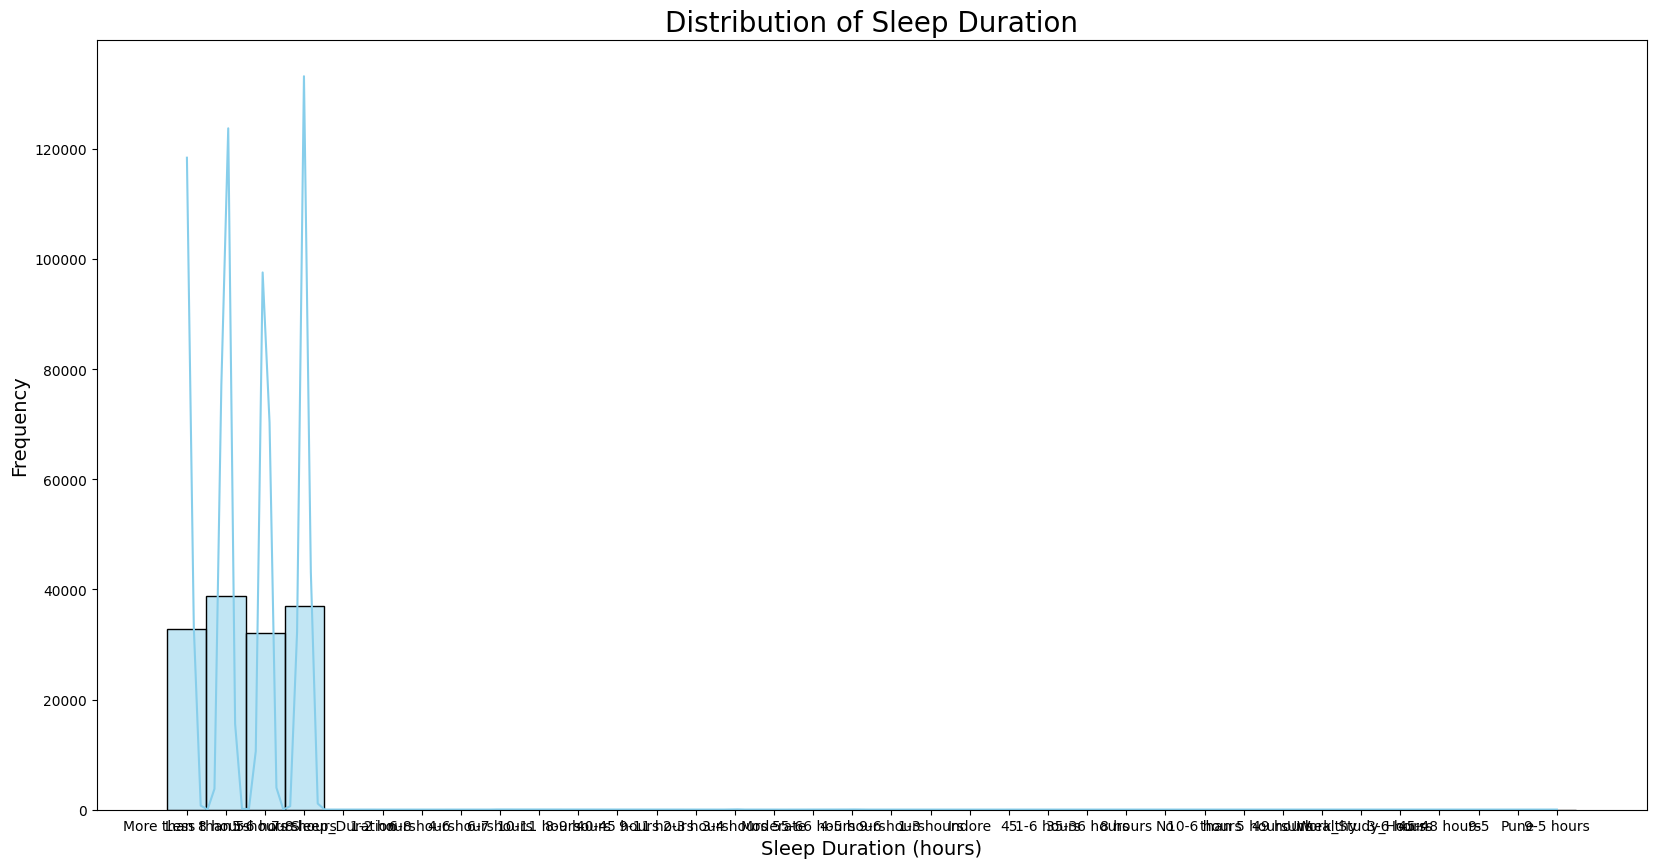

In [135]:
# Set figure size for readability
plt.figure(figsize=(20, 10))

# Plotting histogram with KDE for a smooth curve
sns.histplot(df['Sleep Duration'], kde=True, color='skyblue', bins=30)

# Add title and labels
plt.title('Distribution of Sleep Duration', fontsize=20)
plt.xlabel('Sleep Duration (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [136]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [137]:
Sleep_Duration={
        "More than 8 hours":9,
        'Less than 5 hours':4,
        '5-6 hours':5.5,
        '7-8 hours':7.5,
        '1-2 hours':1.5,
        '6-8 hours':7,
        '4-6 hours':5,
        '6-7 hours':6.5,
        '10-11 hours':10.5,
        '8-9 hours':8.5,
        '9-11 hours':10,
        '2-3 hours':2.5,
        '3-4 hours':3.5,
        'Moderate':6,
        '4-5 hours':4.5,
        '9-6 hours':7.5,
        '1-3 hours':2,
        '1-6 hours':4,
        '8 hours':8,
        '10-6 hours':8,
        'Unhealthy':3,
        'Work_Study_Hours':6,
        '3-6 hours':3.5,
        '9-5':7,
        '9-5 hours':7,
}

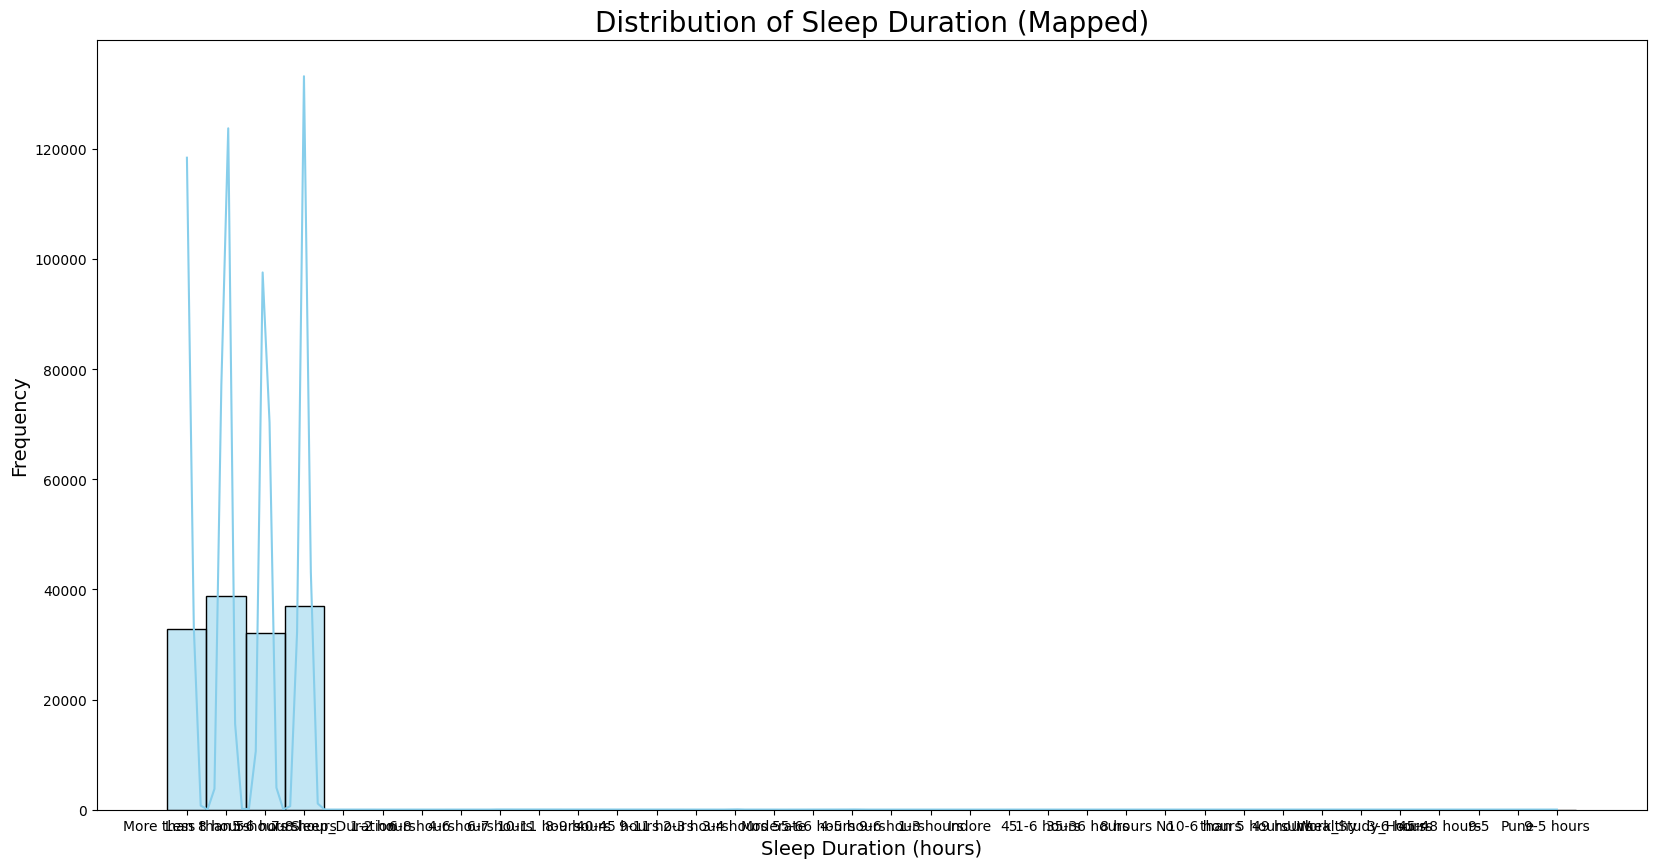

In [138]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Sleep Duration'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Sleep Duration (Mapped)', fontsize=20)
plt.xlabel('Sleep Duration (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

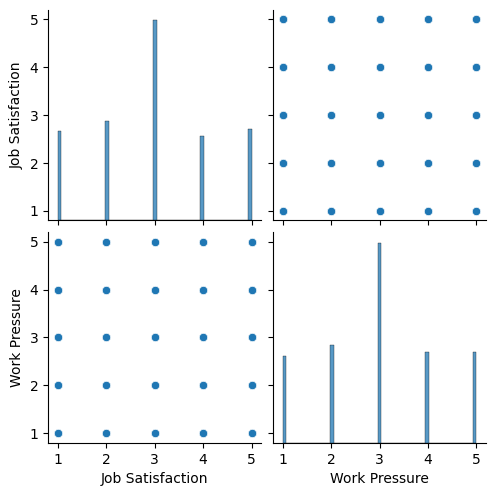

In [139]:
# Pairplot with only relevant columns
sns.pairplot(df[['Sleep Duration', 'Job Satisfaction', 'Work Pressure']], kind='scatter')
plt.show()


In [140]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [141]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                            0
Work Pressure                                0
CGPA                                     75034
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               5
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [142]:
# Mapping Sleep Duration from categorical to numeric values
Sleep_Duration = {
    "More than 8 hours": 9,
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "1-2 hours": 1.5,
    "6-8 hours": 7,
    "4-6 hours": 5,
    "6-7 hours": 6.5,
    "10-11 hours": 10.5,
    "8-9 hours": 8.5,
    "9-11 hours": 10,
    "2-3 hours": 2.5,
    "3-4 hours": 3.5,
    "Moderate": 6,
    "4-5 hours": 4.5,
    "9-6 hours": 7.5,
    "1-3 hours": 2,
    "1-6 hours": 4,
    "8 hours": 8,
    "10-6 hours": 8,
    "Unhealthy": 3,
    "Work_Study_Hours": 6,
    "3-6 hours": 3.5,
    "9-5": 7,
    "9-5 hours": 7,
}

# Apply the mapping
df['Sleep Duration'] = df['Sleep Duration'].map(Sleep_Duration)
test['Sleep Duration'] = test['Sleep Duration'].map(Sleep_Duration)

# Now calculate the median
sleep_med = df['Sleep Duration'].median()

# Fill missing values with the median
df.fillna({'Sleep Duration': sleep_med}, inplace=True)
test.fillna({'Sleep Duration': sleep_med}, inplace=True)


In [143]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112802
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

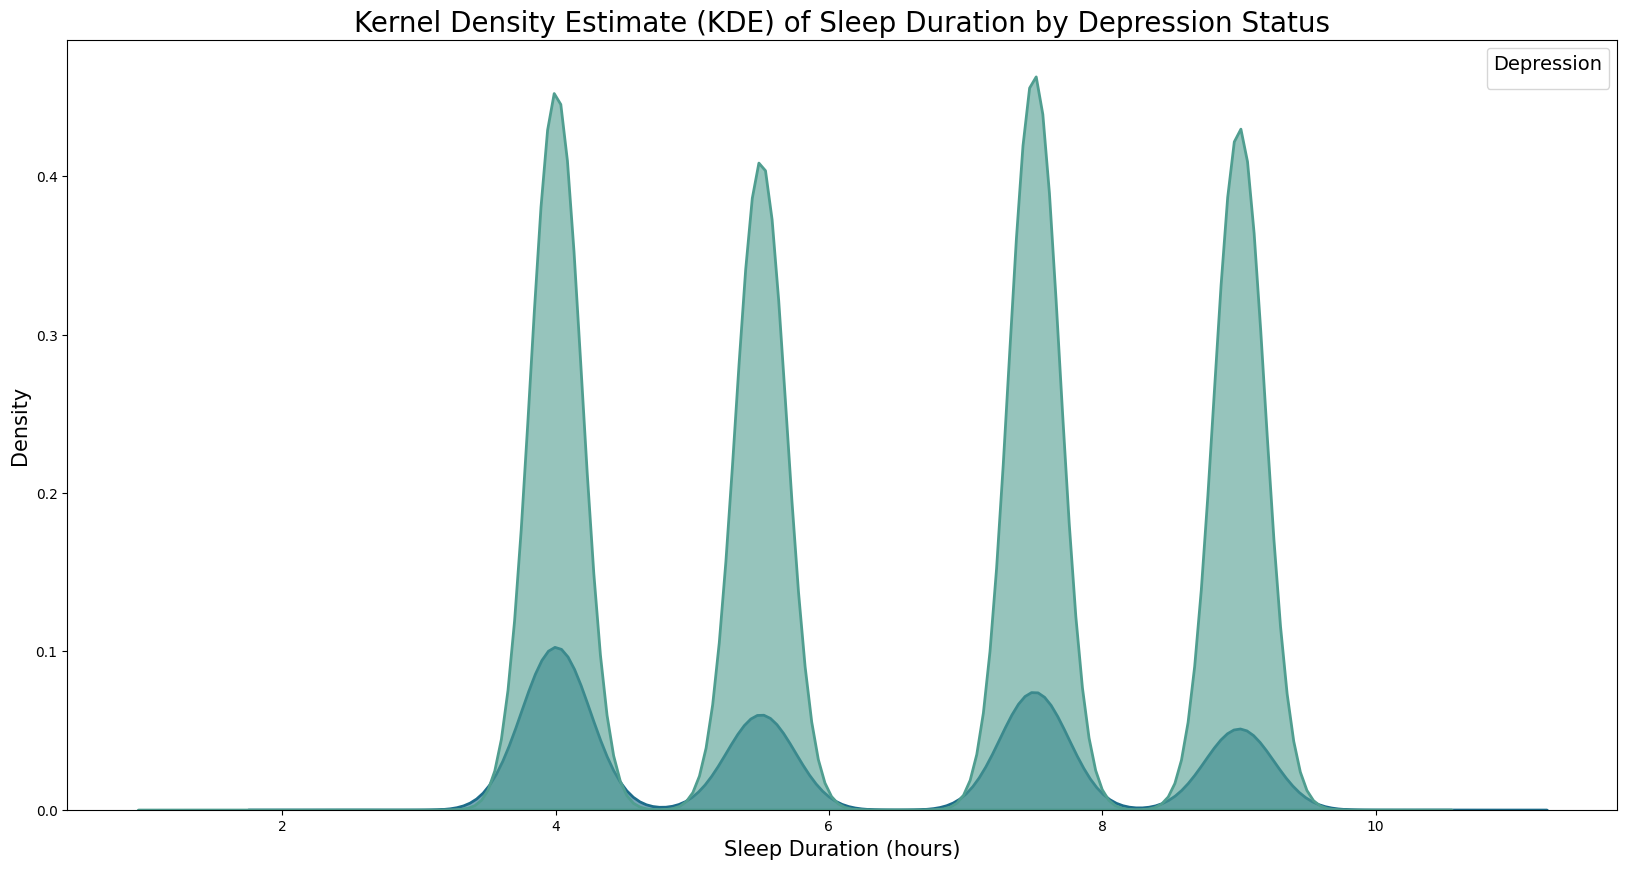

In [144]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create the KDE plot with unique color palette
sns.kdeplot(data=df, x='Sleep Duration', hue='Depression', shade=True, 
             palette="crest", linewidth=2, alpha=0.6)

# Add title and labels
plt.title("Kernel Density Estimate (KDE) of Sleep Duration by Depression Status", fontsize=20)
plt.xlabel("Sleep Duration (hours)", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Improve the legend
plt.legend(title='Depression', title_fontsize=14, fontsize=12)

# Show the plot
plt.show()

## working on dieatary columns

In [145]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,9.0,Healthy,Unknown,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,4.0,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,3.0,8.97,2.0,3.0,5.5,Healthy,Unknown,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,1.0,1.0,4.0,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,5.0,1.0,5.5,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,1.0,5.0,5.5,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,1.0,2.0,7.5,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,1.0,4.0,7.5,Unhealthy,Unknown,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,2.0,3.0,5.90,5.0,3.0,5.5,Moderate,B.Sc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,4.0,1.0,5.5,Healthy,ME,Yes,7.0,2.0,Yes,0


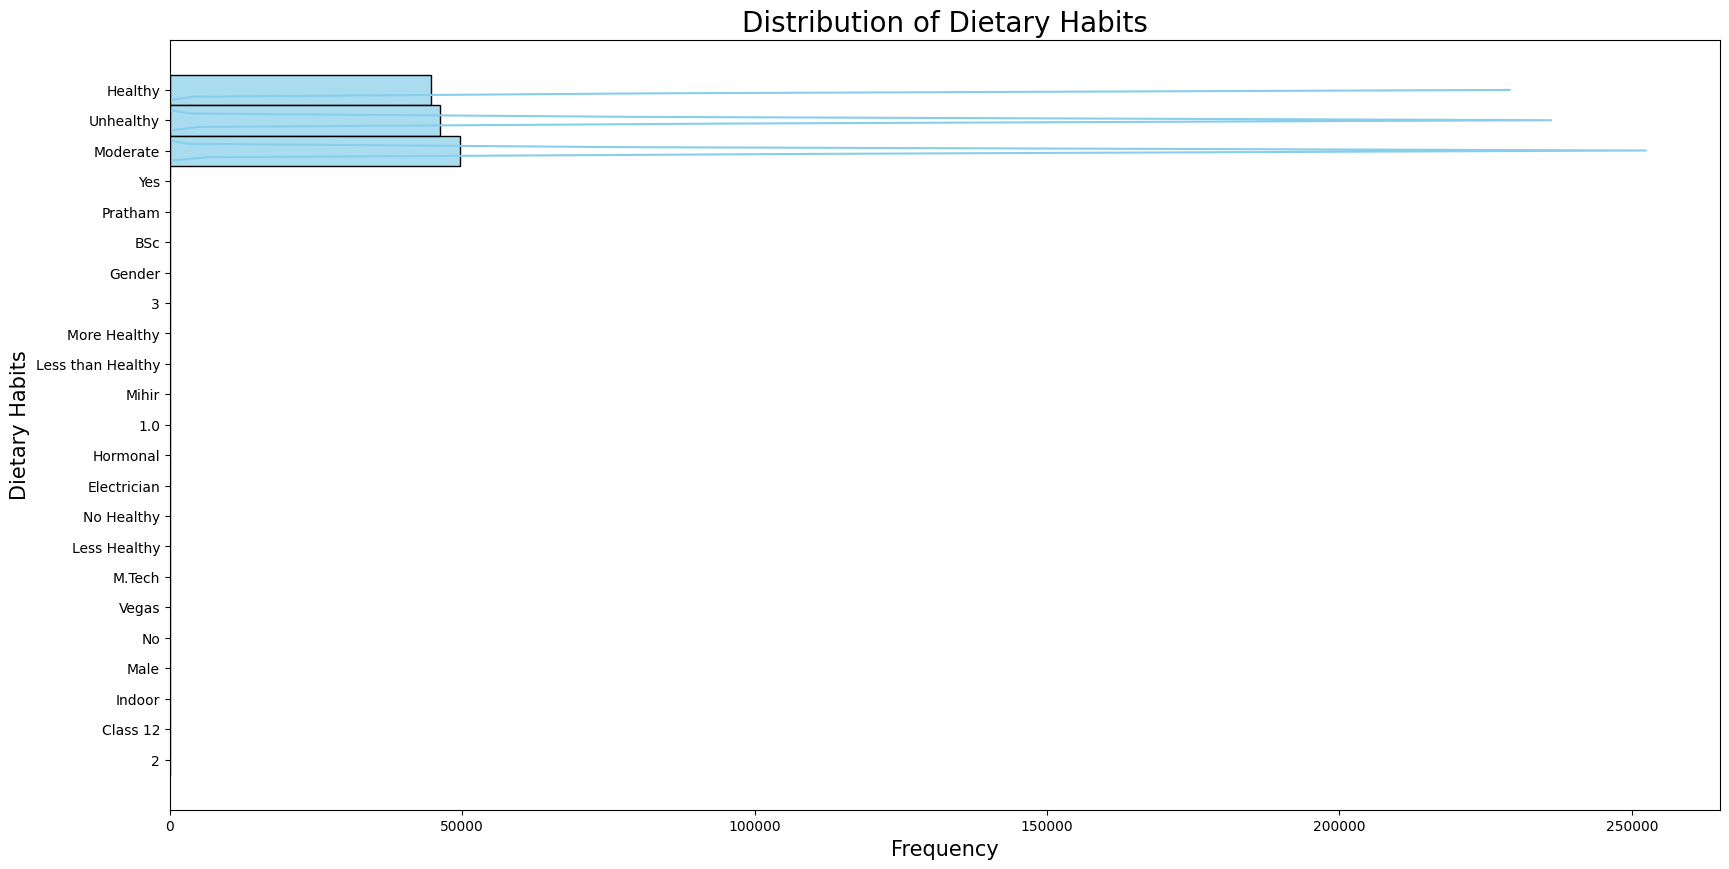

In [146]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create the histogram with improved aesthetics
sns.histplot(data=df, y='Dietary Habits', kde=True, color='skyblue', 
             bins=15, edgecolor='black', alpha=0.7)

# Add title and labels
plt.title("Distribution of Dietary Habits", fontsize=20)
plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Dietary Habits", fontsize=15)

# Show the plot
plt.show()